In [23]:
import warnings
warnings.filterwarnings(action='ignore')

In [24]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt


In [25]:
data=pd.read_csv("data_2.csv")
data=data.drop(columns=['ID','Unnamed: 0'])

In [26]:
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_view_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


Calculate mean of Sale Price

In [27]:
data['Mean_Price']=data['Sale_Price'].mean()
data['Mean_Price'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: Mean_Price, dtype: float64

In [28]:
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9,Mean_Price
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,511618.558147
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,1,0,0,0,0,0,0,0,511618.558147
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,1,0,0,0,0,0,0,0,511618.558147
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,1,0,0,0,0,0,0,511618.558147
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,1,0,0,0,0,0,511618.558147


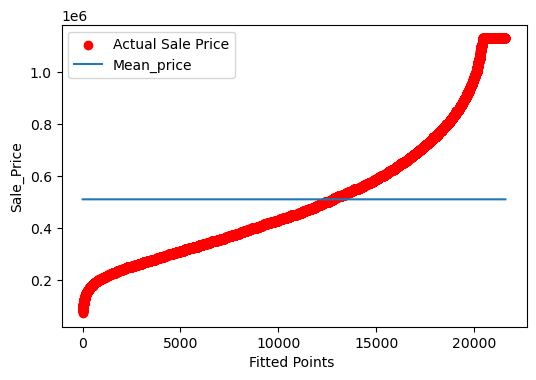

In [29]:
plt.figure(dpi=100)
k=range(0,len(data))
plt.scatter(k,data['Sale_Price'].sort_values(),color='red',label='Actual Sale Price')
plt.plot(k,data['Mean_Price'].sort_values(),label='Mean_price')
plt.xlabel("Fitted Points ")
plt.ylabel("Sale_Price")
plt.legend()

In [30]:
grades_mean=data.pivot_table(values='Sale_Price',columns='Overall Grade',aggfunc=np.mean)
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [31]:
#create new column

data['grades_mean']=0

#for every grade fill its mean price in new column
for i in grades_mean.columns:
    data['grades_mean'][data['Overall Grade']==i]=grades_mean[i][0]

data['grades_mean'].head()



0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grades_mean, dtype: float64

In [32]:
gardewise_list=[]
for i in range(1,11):
    k=data['grades_mean'][data['Overall Grade']==i]
    gardewise_list.append(k)
    


In [33]:
classwise_list=[]
for i in range(1,11):
    k=data['grades_mean'][data['Overall Grade']==i]
    classwise_list.append(k)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 33 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale_Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   No of Times Visited                        21609 non-null  int64  
 7   Overall Grade                              21609 non-null  int64  
 8   Area of the House from Basement (in Sqft)  21609 non-null  float64
 9   Basement Area (in Sqft)                    21609 non-null  int64  
 10  Age of House (in Years

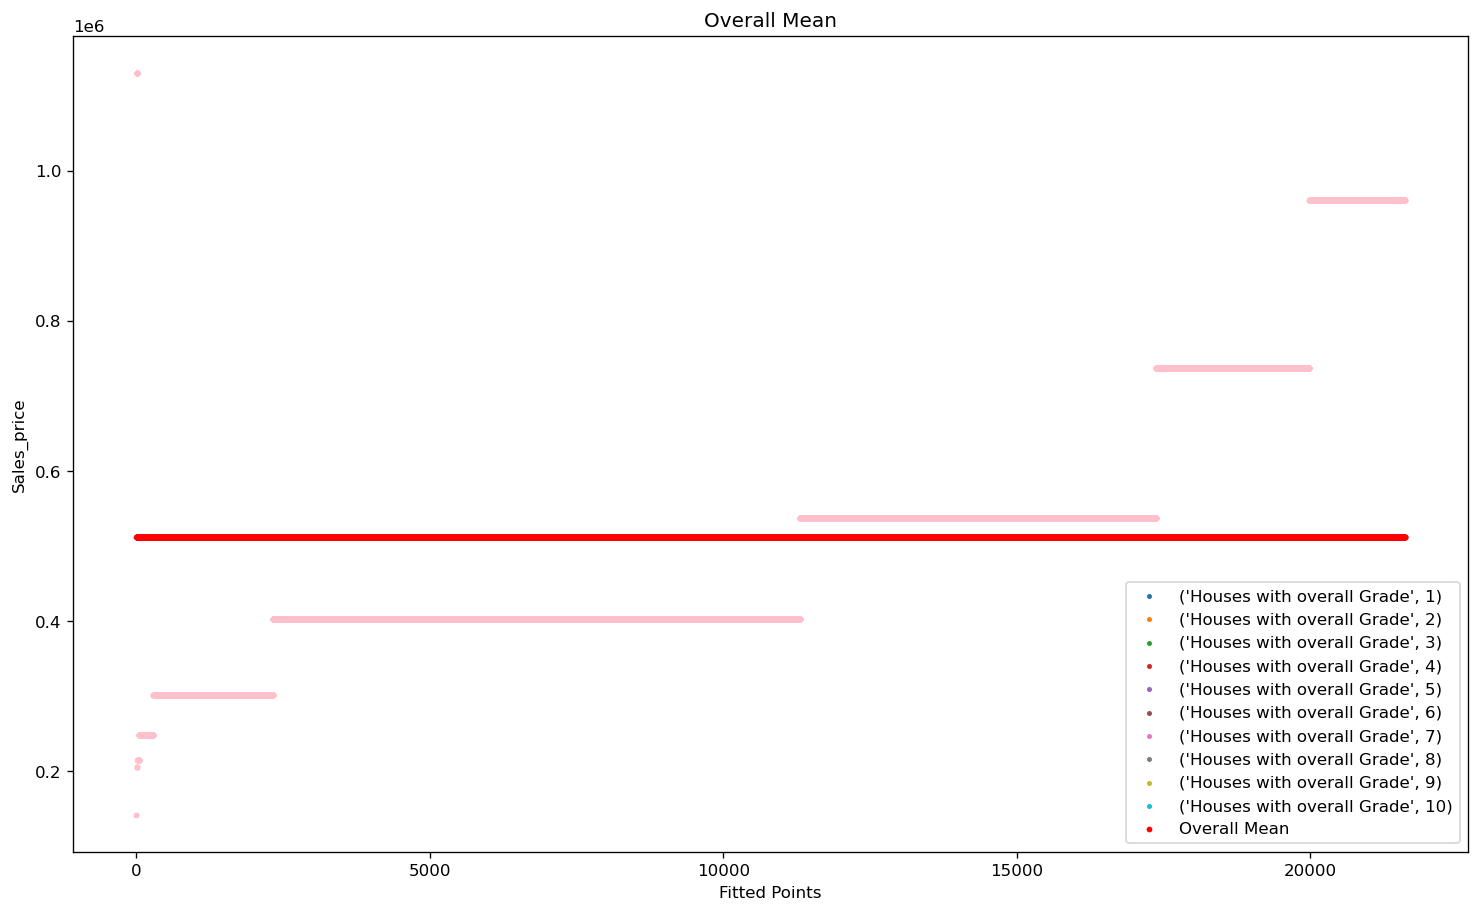

In [37]:



from turtle import color


plt.figure(dpi=120,figsize=(15,9))     #dpi= dotws per inch

#plotting Sales Price with Gradewise
# z variable is for x axis

z=0
for i in range(1,11):
    #deffining x_axis using z
    points=[k for k in range(z,z+len(classwise_list[i-1]))]

    #plotting
    plt.scatter(points,classwise_list[i-1].sort_values(), 
                label=('Houses with overall Grade',i),s=4)

    #plotting Gradewise_list
    plt.scatter(points,[classwise_list[i-1].mean() for q in range (len(classwise_list[i-1]))],s=6,color='pink')

    z=max(points)+1

#plotting overall Mean
plt.scatter([q for q in range  (0,z)],
           data['Mean_Price'],
           color='red',
           label='Overall Mean',
           s=6
           )
plt.xlabel('Fitted Points')
plt.ylabel('Sales_price')
plt.title("Overall Mean")
plt.legend(loc=4)


Residual plot 

In [40]:
#residual is difference between predicted and actual
mean_diff=data['Mean_Price']-data['Sale_Price']
grades_mean_diff=data['grades_mean']-data['Sale_Price']

Text(0.5, 1.0, 'Residuals withrespect to grade wise mean ')

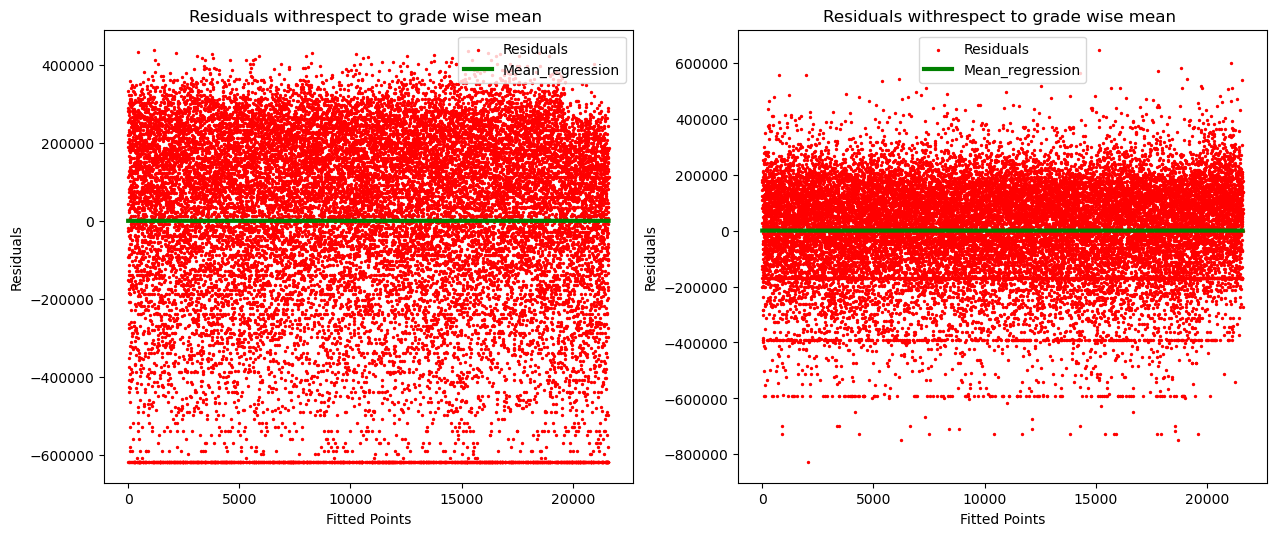

In [45]:
k=range(0,len(data))
l=[0 for i in range(len(data))]

plt.figure(figsize=(15,6),dpi=100)

plt.subplot(1,2,1)

plt.scatter(k,mean_diff,color='red',label='Residuals',s=2)
plt.plot(k,l,color='green',label='Mean_regression',linewidth=3)
plt.xlabel('Fitted Points')
plt.ylabel('Residuals')
plt.legend()
plt.title("Residuals withrespect to grade wise mean ")


plt.subplot(1,2,2)
plt.scatter(k,grades_mean_diff,color='red',label='Residuals',s=2)
plt.plot(k,l,color='green',label='Mean_regression',linewidth=3)
plt.xlabel('Fitted Points')
plt.ylabel('Residuals')
plt.legend()
plt.title("Residuals withrespect to grade wise mean ")
